                   CV1  Datentyp1 Error1         X         Y       Phi
10          Mittelwert  30 Trials    MAE  0.052744  0.552582  0.749730
11  Standardabweichung  30 Trials    MAE  0.059434  0.152045  0.247418
22          Mittelwert  60 Trials    MAE  0.008298  0.558982  0.794832
23  Standardabweichung  60 Trials    MAE  0.010249  0.161176  0.250251
           CV1  Datentyp1 Error1         X         Y       Phi
10  Mittelwert  30 Trials    MAE  0.052744  0.552582  0.749730
22  Mittelwert  60 Trials    MAE  0.008298  0.558982  0.794832
                   CV1  Datentyp1 Error1         X         Y       Phi
11  Standardabweichung  30 Trials    MAE  0.059434  0.152045  0.247418
23  Standardabweichung  60 Trials    MAE  0.010249  0.161176  0.250251
                   CV1  Datentyp1 Fehler       MAE
0           Mittelwert  30 Trials      X  0.052744
1   Standardabweichung  30 Trials      X  0.059434
2           Mittelwert  60 Trials      X  0.008298
3   Standardabweichung  60 Trials      

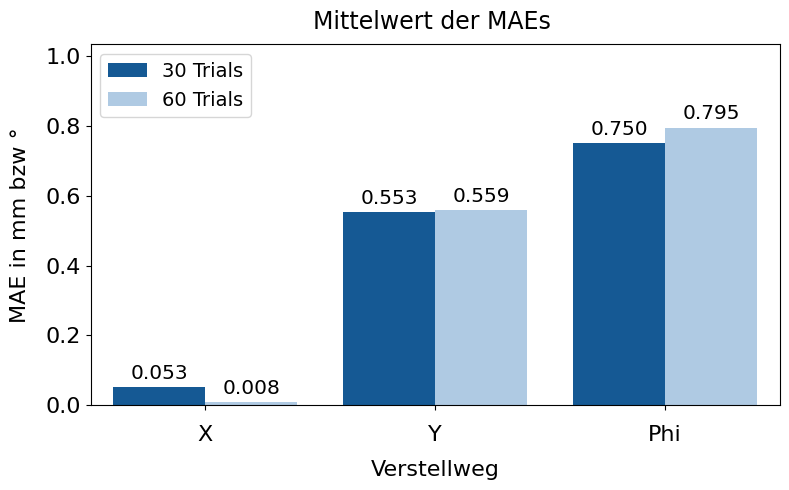

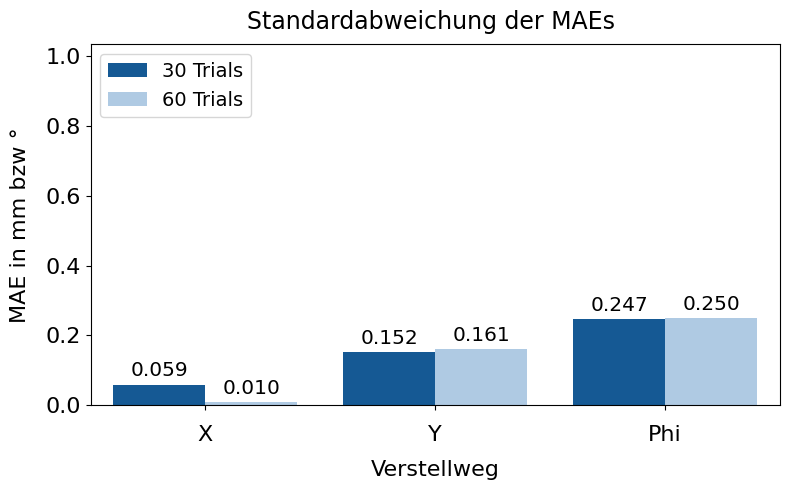

In [5]:
#Plots für den Vergleich der Ergebnisse der Bayesian Optimization für 30 und 60 Trials 
import pandas as pd

# Reinladen der Daten von Mittelwert und Standardabweichung der vier konventionellen Modelle 
Ordner_60 = r'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\Desktop\\Masterthesis\\13_ExcelvonDaten_Code\\DeepLearning\\CNN\\Seed2\\60Trials_Seed2_bestesModell\\Blechsplit'
Ordner_30 = r'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\Desktop\\Masterthesis\\13_ExcelvonDaten_Code\\DeepLearning\\CNN\\Seed2\\Trial2_Bayesian30Trials_Modell2'

# Für die Ergebnisse des gesamten stationären Bereiches ohne Features
MAEs_60Trials =pd.read_csv(f'{Ordner_60}\CNN_Blechsplit_bestesModell_Randomseed2_Trial03_60Trials.csv', delimiter= ';')
MAES_30Trials =pd.read_csv(f'{Ordner_30}\CNN_Blechsplit_bestesModell_Randomseed2_Trial02.csv', delimiter= ';')

#print(MAEs_60Trials)
#print(MAES_30Trials)

# Droppen der unnötigen Columns
MAEs_60Trials = MAEs_60Trials.drop(columns=['Unnamed: 0','CV','Datentyp','Error','X','y','phi'])
MAEs_30Trials = MAES_30Trials.drop(columns=['Unnamed: 0','CV','Datentyp','Error','X','y','phi'])

# Umbenennen des Datentyps zu der Anzahl an Trials für Unterscheidung beim PLot
MAEs_60Trials['Datentyp1'] = MAEs_60Trials['Datentyp1'].replace('Blechsplit', '60 Trials')
MAEs_30Trials['Datentyp1'] = MAEs_30Trials['Datentyp1'].replace('Blechsplit', '30 Trials')

#print(MAEs_60Trials)

# Zusammenfügen der Beiden Trials
MAEs_ges = pd.concat([MAEs_30Trials, MAEs_60Trials], axis=0, ignore_index=True)

# Umbenennne der Variablen 
Ersetzen = {
    'X1': 'X',
    'y1': 'Y',
    'phi1': 'Phi'}
MAEs_ges = MAEs_ges.rename(columns=Ersetzen)
#print(MAEs_ges)

# 
columns = ['X','Y','Phi']

for Column in columns:
        MAEs_ges[Column] = MAEs_ges[Column].astype(str).str.replace(',', '.')
        MAEs_ges[Column] = MAEs_ges[Column].astype(float)
        
#print(MAEs_ges)
MAEs_ges = MAEs_ges[MAEs_ges['CV1'].isin(['Mittelwert','Standardabweichung'])]
MAEs_Mittelwert = MAEs_ges[MAEs_ges['CV1']=='Mittelwert']
MAEs_Standardabweichung = MAEs_ges[MAEs_ges['CV1']=='Standardabweichung']

print(MAEs_ges)

print(MAEs_Mittelwert)
print(MAEs_Standardabweichung)

# Umstrukturieren des DataFrames für die passende Aufteilung bei den Plots
MAEs_melted = MAEs_ges.melt(id_vars=['CV1', 'Datentyp1'], value_vars=['X', 'Y', 'Phi'],
                            var_name='Fehler', value_name='MAE')

print(MAEs_melted)

# Beispielhafter Plot für MAE Testdaten
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Plot der MAE's aller konventionellen Methoden in Gegenüberstellung der unterschiedlichen Splits

Labels = ['Mittelwert', 'Standardabweichung']

color_thesis1 =(0, 90/255, 169/255) # Dunkelblau aus Thesis
color_thesis2 =(166/255, 202/255, 236/255)  #Hellblau aus Abbildungen
color_thesis3 =(77/255, 140/255, 195/255) #mittleres Blau
#custom_palette = sns.color_palette(["#1f77b4", "#aec7e8", "#003f5c", "#7fbc41", "#2ca02c", "#98df8a"])
custom_palette = sns.color_palette([color_thesis1,color_thesis2])


Sicherungsordner = f'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\\Desktop\\Masterthesis\\15_Plots\\DeepLearning\VergleichCNN_60_30Trial'     
# Sicherstellen, dass das Verzeichnis existiert
os.makedirs(Sicherungsordner, exist_ok=True)

# Schleife durch Metriken (X, y, phi)
for cv in Labels:
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(data=MAEs_melted[MAEs_melted['CV1'] == cv], x='Fehler', y='MAE', hue='Datentyp1', palette=custom_palette)
    plt.title(f'{cv} der MAEs ', fontsize=17, pad=11)
    ax.set_xlabel('Verstellweg', fontsize=16, labelpad=11)
    # Anpassen der Y-Achsen-Beschriftung mit kursivem 'mm' oder anderer Einheit
    ax.set_ylabel(f'MAE in mm bzw °', fontsize=16, labelpad=11)  # MathText für Kursivschrift
    
    # Werte auf den Balken anzeigen

    for p in ax.patches:
        height = p.get_height()
        display_value = 0 if height < 0.0009 else height
        ax.annotate(f'{display_value:.3f}' if display_value != 0 else '0',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14.5)
        
        # Anpassen der Legende, um Titel dieser zu entfernen 
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles[0:2], labels[0:2], title=None, loc='upper left', fontsize=14)
        
        # Problem mit Beschriftung der Balken (krzeut immer den Rand des Diagramms), deshalb wird hier der höchste Wert ermittelt und eine Obergrenze festgelegt
        max_value = MAEs_melted['MAE'].max()  # Höchster Balkenwert
        plt.ylim(0, max_value * 1.3)  # Vergrößern des Plots um 1.3 
        
        
        ax.tick_params(axis='x', labelsize=16, pad=10.5)
        ax.tick_params(axis='y', labelsize=16)
        
        plt.tight_layout()
        
        # Zur Speicherung der Plots muss aktiviert sein
        plt.savefig(os.path.join(Sicherungsordner, f'{cv}_CNN_60zu30Trials_RandomSeed2.svg'), format='svg')    
        plt.savefig(os.path.join(Sicherungsordner, f'{cv}_CNN_60zu30Trials_RandomSeed2.png'), format='png')      

plt.show()

1_MLP_Mittelwert_Std_RandomSeed2.csv
MLP
2_CNN_MAE_Mittelwert_Std_RandomSeed2.csv
CNN
3_RNN_Mittelwert_Std_RandomSeed2.csv
RNN
4_LSTM_Mittelwert_Std_RandomSeed2_Modell1.csv
LSTM
5_CNN-KNR_MAE_Mittelwert_Std_Randomseed2.csv
CNN-KNR
6_TE_Mittelwert_Std_RandomSeed2.csv
TE
      Modell          CV        Datentyp Error             X         Y  \
10       MLP  Mittelwert  Standard Split   MAE  8.447293e-03  0.108824   
22       MLP  Mittelwert     Blech Split   MAE  1.860457e-02  0.621917   
34       CNN  Mittelwert  Standard Split   MAE  4.959193e-03  0.115775   
46       CNN  Mittelwert     Blech Split   MAE  8.297832e-03  0.558982   
58       RNN  Mittelwert  Standard Split   MAE  9.728561e-03  0.090498   
70       RNN  Mittelwert     Blech Split   MAE  5.547769e-02  0.643771   
82      LSTM  Mittelwert  Standard Split   MAE  5.360269e-03  0.032192   
94      LSTM  Mittelwert     Blech Split   MAE  2.068257e-01  0.624415   
106  CNN-KNR  Mittelwert  Standard Split   MAE  6.030000e-18  0.

C:\Users\corvi\AppData\Local\Temp\ipykernel_17736\2084934719.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MAEs_Mittelwert['Datentyp'] = MAEs_Mittelwert['Datentyp'].replace(Umbenennung_Split)


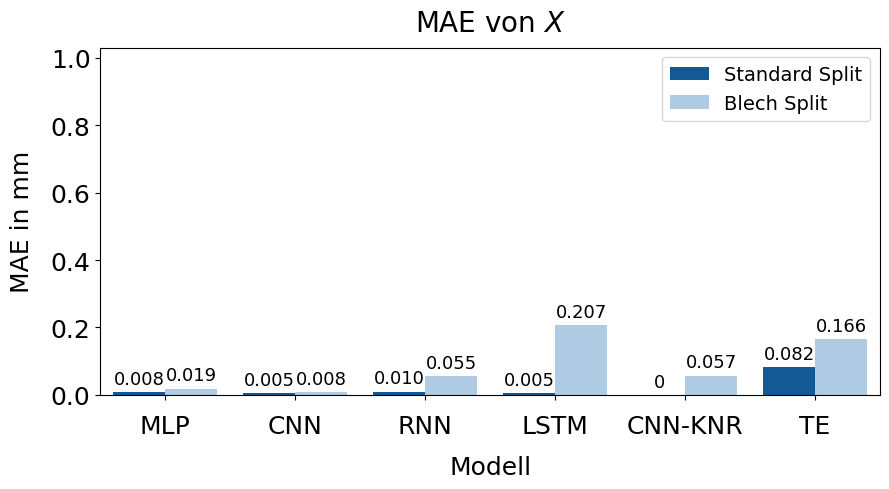

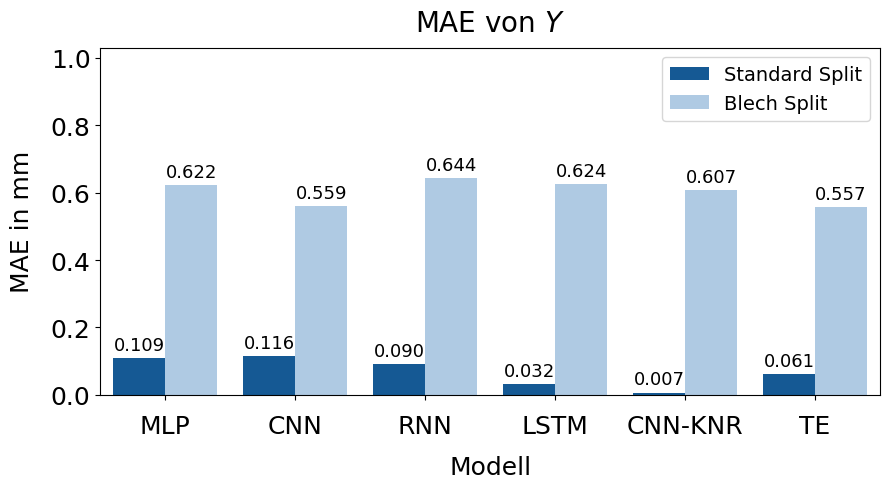

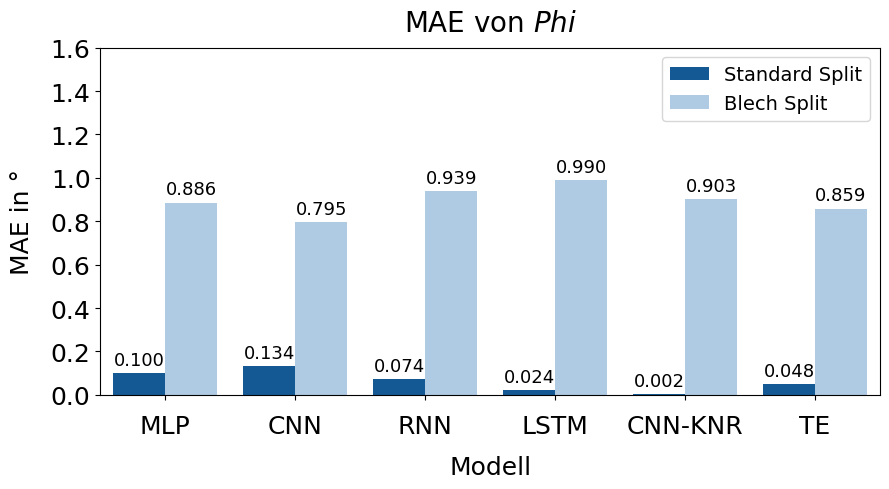

In [24]:
# Plots für die Gesamtübersicht von den Deep Learning Modellen mit der Gegenüberstellung von Standard und Blechsplit

import pandas as pd
import os
Speichern =0
# Reinladen der Daten von Mittelwert und Standardabweichung der vier konventionellen Modelle 
Ordner = r'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\Desktop\\Masterthesis\\13_ExcelvonDaten_Code\\DeepLearning\\Alle_Modelle_best_MAE_RandomSeed2'

csv_files = [file for file in os.listdir(Ordner) if file.endswith('.csv')]

columns_to_Float = ['X','y','phi']

Liste_MAES = []

for file in csv_files:
    print(file)

    Pfad = os.path.join(Ordner, file)
    
    Modellname = file.split('_')[1]
    
    MAEs =pd.read_csv(Pfad, delimiter= ';')
    
    #print(MAEs)
    
    for Column in columns_to_Float:
        MAEs[Column] = MAEs[Column].astype(str).str.replace(',', '.')
        MAEs[Column] = MAEs[Column].astype(float)
    
    
    MAEs = MAEs.drop(columns=['Unnamed: 0'])
    #print(MAEs)
       
    MAEs.insert(0, 'Modell', Modellname)
    
    #print(MAEs)
    
    Liste_MAES.append(MAEs)
    print(Modellname)  # Ausgabe: report

MAEs_alle = pd.concat(Liste_MAES, ignore_index=True)

#Ersetzen der Columns Bezeichnung für die Verstellwege 

Umbenennen = {'y':'Y','phi':'Phi'}

MAEs_alle = MAEs_alle.rename(columns=Umbenennen)

if Speichern ==1:
    
    for Column in MAEs_alle.columns:
        MAEs_alle[Column] = MAEs_alle[Column].astype(str).str.replace('.', ',')

    MAEs_alle.to_csv(f'{Ordner}\GesamtübersichtDeepLearningModelle.csv', index=True, sep=';')

MAEs_Mittelwert = MAEs_alle[MAEs_alle['CV'] == 'Mittelwert']

#MAEs_Mittelwert = MAEs_Mittelwert[MAEs_alle['Datentyp'] == 'Blechsplit']

Umbenennung_Split = {'Standardsplit':'Standard Split', 'Blechsplit':'Blech Split'}
MAEs_Mittelwert['Datentyp'] = MAEs_Mittelwert['Datentyp'].replace(Umbenennung_Split)

print(MAEs_Mittelwert)

# Beispielhafter Plot für MAE Testdaten
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# Plot der MAE's aller konventionellen Methoden in Gegenüberstellung der unterschiedlichen Splits

Labels = ['X', 'Y', 'Phi']
Y_Achse = ['mm', 'mm', '°']

color_thesis1 =(0, 90/255, 169/255) # Dunkelblau aus Thesis
color_thesis2 =(166/255, 202/255, 236/255)  #Hellblau aus Abbildungen
color_thesis3 =(77/255, 140/255, 195/255) #mittleres Blau
#custom_palette = sns.color_palette(["#1f77b4", "#aec7e8", "#003f5c", "#7fbc41", "#2ca02c", "#98df8a"])
custom_palette = sns.color_palette([color_thesis1,color_thesis2])


Sicherungsordner = f'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\\Desktop\\Masterthesis\\15_Plots\\DeepLearning\\AlleModelle'     
# Sicherstellen, dass das Verzeichnis existiert
os.makedirs(Sicherungsordner, exist_ok=True)

# Berechne den maximalen Wert für 'Y'
max_y_value = MAEs_Mittelwert['Y'].max()

# Schleife durch Metriken (X, y, phi)
for index, (Label, Einheit) in enumerate(zip(Labels, Y_Achse)):
    plt.figure(figsize=(9,5))
    ax = sns.barplot(data=MAEs_Mittelwert, x='Modell', y=Label, hue='Datentyp', palette=custom_palette, width=0.8)
    plt.title(f'MAE von $\\it{{{Label}}}$', fontsize= 20, pad=12)
    ax.set_xlabel('Modell', fontsize=18, labelpad=12)
    # Anpassen der Y-Achsen-Beschriftung mit kursivem 'mm' oder anderer Einheit
    ax.set_ylabel(f'MAE in {Einheit}', fontsize=18, labelpad=12)  # MathText für Kursivschrift

    for p in ax.patches:
        height = p.get_height()
        display_value = 0 if height < 0.0009 else height
        ax.annotate(f'{display_value:.3f}' if display_value != 0 else '0',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=13)
        
        # Anpassen der Legende, um Titel dieser zu entfernen 
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles[0:2], labels[0:2], title=None, loc='upper right', fontsize=14)
        
        # Problem mit Beschriftung der Balken (krzeut immer den Rand des Diagramms), deshalb wird hier der höchste Wert ermittelt und eine Obergrenze festgelegt
        max_value = MAEs_Mittelwert[Label].max()  # Höchster Balkenwert
        
        if Label == 'X':
                plt.ylim(0, max_y_value * 1.6)  # Verwende den maximalen Y-Wert für X
        else:
                plt.ylim(0, max_value * 1.6)  
                
                   # Setze die Ticks der y-Achse in einem gewünschten Abstand
        y_ticks = np.arange(0, plt.ylim()[1] + 0.1, 0.2)  # Intervalle
        ax.set_yticks(y_ticks)
        
        ax.tick_params(axis='x', labelsize=18, pad=10.5)
        ax.tick_params(axis='y', labelsize=18)
        
        plt.tight_layout()
        
        # Speicherung der Daten als png und svg
        plt.savefig(os.path.join(Sicherungsordner, f'{Label}_MAE_BarChart_Mittelwert_Blechsplit-Standardsplit_Random2.svg'), format='svg')    
        plt.savefig(os.path.join(Sicherungsordner, f'{Label}_MAE_BarChart_Mittelwert_Blechsplit-Standardsplit_Random2.png'), format='png')      

#plt.show()

        Unnamed: 0 SplitMethode  CV Label_X Label_Y Label_Phi  \
0                0   Blechsplit   7     0,0     0,0       0,0   
1                1   Blechsplit   7     0,0    -6,0       0,0   
2                2   Blechsplit   7     0,0     0,0     -5,25   
3                3   Blechsplit   7     0,0     8,0       0,0   
4                4   Blechsplit   7     0,0     0,0     -5,25   
...            ...          ...  ..     ...     ...       ...   
250595      250595   Blechsplit  77     0,0     0,0       3,5   
250596      250596   Blechsplit  77     0,0    -2,0       0,0   
250597      250597   Blechsplit  77     0,0     6,0      -3,5   
250598      250598   Blechsplit  77     0,0     0,0       7,0   
250599      250599   Blechsplit  77     0,0    -2,0       0,0   

                      Fehler_X              Fehler_Y            Fehler_Phi  
0        -0,001573982648551464    0,7299762964248657   0,24445931613445282  
1        -0,003297491930425167  -0,32626867294311523  0,011070040

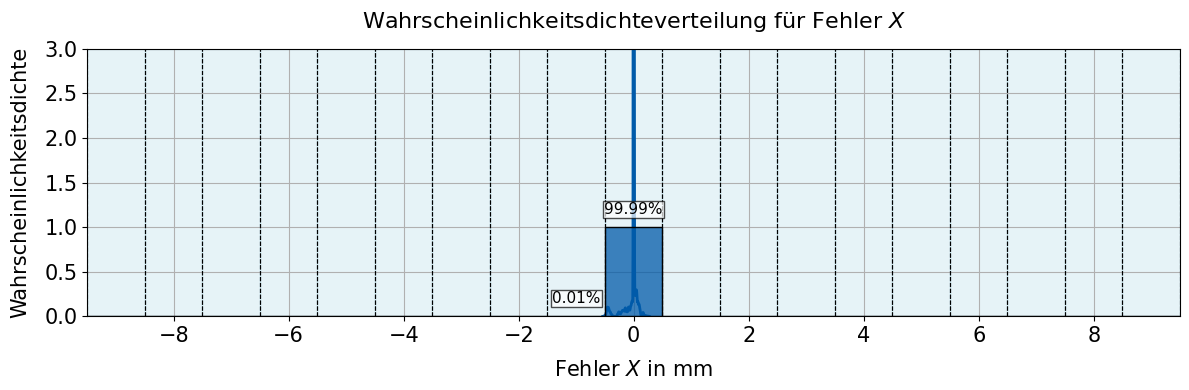

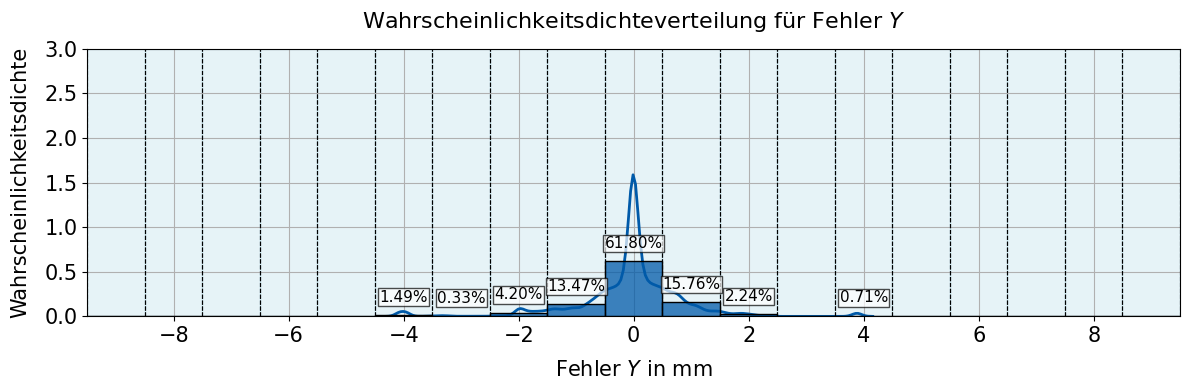

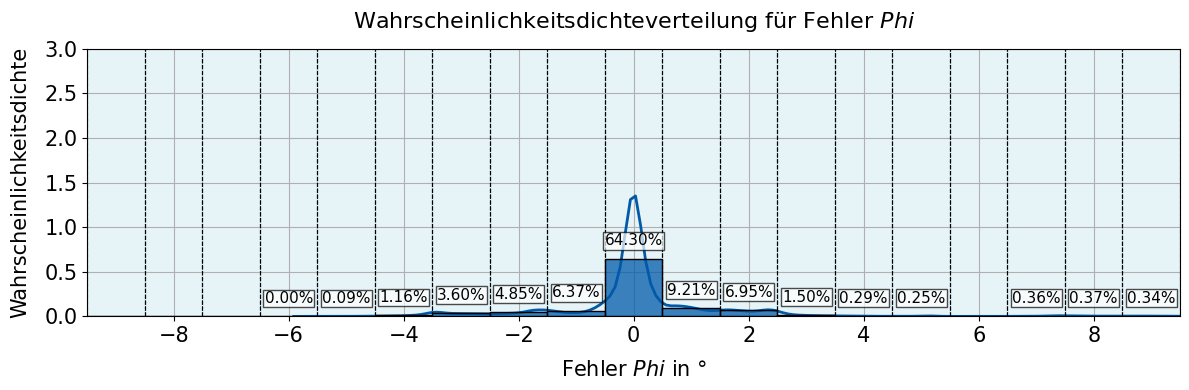

In [3]:
# Plots der Dichteverteilung der Fehler für das CNN (Bestes Deep Learning Modell)

import pandas as pd
Ordner = r'C:\Users\corvi\OneDrive - stud.tu-darmstadt.de\Desktop\Masterthesis\13_ExcelvonDaten_Code\DeepLearning\CNN\Seed2\60Trials_Seed2_bestesModell\Blechsplit'
# Für die Ergebnisse des gesamten stationären Bereiches ohne Features bestes CNN ohne Int
Liste_Fehler =pd.read_csv(f'{Ordner}\Fehler_CNN_Blechsplit_Randomseed2_Trial03_60Trials.csv', delimiter= ';')

Ordner_int = r'C:\Users\corvi\OneDrive - stud.tu-darmstadt.de\Desktop\Masterthesis\13_ExcelvonDaten_Code\DeepLearning\Interpolation_CNN'
# Für die Ergebnisse des gesamten stationären Bereiches ohne Features bestes CNN mit Intfaktor2
#Liste_Fehler =pd.read_csv(f'{Ordner_int}\Fehler_CNN_Blechsplit_Randomseed2_Modell3_Interpolation_Faktor2.csv', delimiter= ';')

# Reinladen der Daten von Mittelwert und Standardabweichung der neuen Testdaten
Ordner_kurzesBlech = r'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\Desktop\\Masterthesis\\13_ExcelvonDaten_Code\\Evaluation_kurzesBlech'
#Liste_Fehler =pd.read_csv(f'{Ordner_kurzesBlech}\Fehler_CNNmitIntfaktor2_neuesBlech.csv', delimiter= ';')
print(Liste_Fehler)

# MAEs_ges = MAEs_ges.drop(columns=['Model.1','Datentyp.1'])

columns = ['Label_X','Label_Y','Label_Phi','Fehler_X','Fehler_Y','Fehler_Phi']

for Column in columns:
         Liste_Fehler[Column] = Liste_Fehler[Column].astype(str).str.replace(',', '.')
         Liste_Fehler[Column] = Liste_Fehler[Column].astype(float)

Liste_Fehler =Liste_Fehler.drop(columns=['SplitMethode'])  

print(Liste_Fehler.dtypes)

Liste_Vorhersage = pd.DataFrame()
Liste_Vorhersage['X'] = Liste_Fehler['Label_X'] - Liste_Fehler['Fehler_X']
Liste_Vorhersage['Y'] = Liste_Fehler['Label_Y'] - Liste_Fehler['Fehler_Y']
Liste_Vorhersage['Phi'] = Liste_Fehler['Label_Phi'] - Liste_Fehler['Fehler_Phi']

print(Liste_Vorhersage.dtypes)


import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import numpy as np
import os


# print(Liste_Fehler['Fehler_Phi'])
# print(Liste_Fehler['Fehler_Phi'].shape)
# print(type(Liste_Fehler['Fehler_Phi']))
Sicherungsordner = f'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\\Desktop\\Masterthesis\\15_Plots\\DeepLearning\\CNN_Dichteverteilung'    
#Sicherungsordner = f'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\\Desktop\\Masterthesis\\15_Plots\\Interpolation\\Dichteverteilung'     
# Sicherstellen, dass das Verzeichnis existiert
os.makedirs(Sicherungsordner, exist_ok=True)

#Farbe für die Balken (wie Header in Thesis)
color_thesis2 =(0, 90/255, 169/255) 
highlight_color = (173/255, 216/255, 230/255)  # Hellblau

Variablen = ['X','Y','Phi']
Liste_Benennung =['Fehler','Fehler', 'Fehler']
Liste_Benennung_Labels = ['Label', 'Label', 'Label']
Liste_Benennung_Vorhersage = ['Vorhersage', 'Vorhersage', 'Vorhersage']
ListeFehler = [Liste_Fehler['Fehler_X'],Liste_Fehler['Fehler_Y'], Liste_Fehler['Fehler_Phi']]
Liste_Labels = [Liste_Fehler['Label_X'], Liste_Fehler['Label_Y'], Liste_Fehler['Label_Phi']]
Liste_Vorhersagen = [Liste_Vorhersage['X'], Liste_Vorhersage['Y'],Liste_Vorhersage['Phi']]
Einheit = ['mm', 'mm', '°']

# Bereiche definieren für Prozente und der Bar Plots (Bis 9,5 da das letzte Label in der Größenordnung von Y bei 9 mm liegt)

bins= np.arange(-9.5, 10.5, 1)
bins_histo = np.arange(-9.5,10.5,1)

for fehler, name, variable, einheit in zip(ListeFehler, Liste_Benennung,Variablen, Einheit):
    
    plt.figure(figsize=(12, 4))  # Größe der Abbildung in Zoll (Breite, Höhe)
    hist_data = sns.histplot(fehler, kde=False, color=color_thesis2 , bins=bins_histo, stat='density', zorder=3)
    
    # KDE-Kurve plotten
    sns.kdeplot(fehler, color=color_thesis2, linewidth=2, zorder=2)
    
    
    hist_data.set_xlabel(f'{name} $\\it{{{variable}}}$ in {einheit}', fontsize=15, labelpad=10)  # MathText für Kursivschrift
    plt.ylabel('Wahrscheinlichkeitsdichte',labelpad=10.5, fontsize=15)
    plt.title(f'Wahrscheinlichkeitsdichteverteilung für {name} $\\it{{{variable}}}$',pad=15, fontsize=16)
    plt.grid(True, zorder=1)
    
    # Festlegen des X-Achsen-Bereichs
    plt.xlim(-9.5, 9.5)
    
    # Begrenzen der Y-Achse
    plt.ylim(0, 3)
    
    # Set the x-axis ticks to be at 1-unit intervals
    plt.xticks(np.arange(-8, 9, 2), fontsize=15)
    plt.yticks(fontsize=15)
    
     # Berechnung und Anzeige der Wahrscheinlichkeiten
    for i in range(len(bins) - 1):
        count_in_range = np.sum((fehler >= bins[i]) & (fehler < bins[i + 1]))
        percentage_in_range = (count_in_range / len(fehler)) * 100
        
        # Bereich der Histogrammblöcke
        bin_width = bins[i + 1] - bins[i]
        
        # Bereiche der Wahrscheinlichkeiten im Plot hervorheben
        plt.axvspan(bins[i], bins[i + 1], color=highlight_color, alpha=0.3, zorder=0)
        plt.axvline(x=bins[i], color='black', linestyle='--', linewidth=0.8, zorder=2)
        plt.axvline(x=bins[i + 1], color='black', linestyle='--', linewidth=0.8, zorder=2)
        
        # # Höhe des Histogrammblöcke berechnen
        # hist_height = hist_data.patches[i].get_height()
        
         # Wahrscheinlichkeit nur plotten, wenn sie größer als 0 ist
        if percentage_in_range > 0:
            
            # Höhe der Histogrammblöcke berechnen, falls die Beschriftung an die Höhe der Balken angepasst werden soll
            hist_height = hist_data.patches[i].get_height() if i < len(hist_data.patches) else 0
            
            # Wahrscheinlichkeit an den oberen Bereich (0,8 mal der y Achse) setzen
            # plt.text((bins[i] + bins[i + 1]) / 2, plt.gca().get_ylim()[1] * 0.8, f'{percentage_in_range:.2f}%', 
            #          horizontalalignment='center', verticalalignment='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5, pad=1))
            
            # Wahrscheinlichkeit an die Höhe der Balken anpassen setzen
            plt.text((bins[i] + bins[i + 1]) / 2, min(hist_height + 0.2, plt.ylim()[1] * 0.95), f'{percentage_in_range:.2f}%', 
                     horizontalalignment='center', verticalalignment='center', fontsize=11, bbox=dict(facecolor='white', alpha=0.7, pad=1))
    plt.tight_layout()
     
    plt.savefig(os.path.join(Sicherungsordner, f'{variable}_Dichteverteilung_CNN_Random2_Fehler.svg'), format='svg')    
    plt.savefig(os.path.join(Sicherungsordner, f'{variable}_Dichteverteilung_CNN_Random2_Fehler.png'), format='png') 
    
    plt.show()

   Unnamed: 0        Fenstergröße    Datentyp Error            X            Y  \
0           0                   1  Blechsplit   MAE  0,058532548   0,60542783   
1           1                   5  Blechsplit   MAE  0,011934197  0,474590331   
2           2                  10  Blechsplit   MAE  0,014427623   0,46268246   
3           3                  25  Blechsplit   MAE  0,016821304  0,468111464   
4           4                  50  Blechsplit   MAE  0,015139693  0,389990312   
5           5                 100  Blechsplit   MAE  0,025322287  0,395562187   
6           6          Mittelwert  Blechsplit   MAE  0,023696275  0,466060764   
7           7  Standardabweichung  Blechsplit   MAE  0,017668869  0,077805288   

           Phi  
0  0,713701987  
1  0,723199646  
2  0,765702387  
3  0,697863048  
4  0,850431889  
5   0,66473958  
6  0,735939756  
7  0,065069797  
         Fenstergröße    Datentyp Error         X         Y       Phi
0                   1  Blechsplit   MAE  0.0585

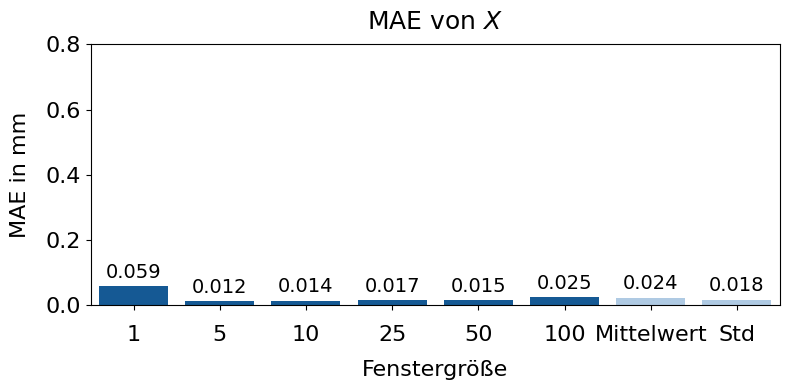

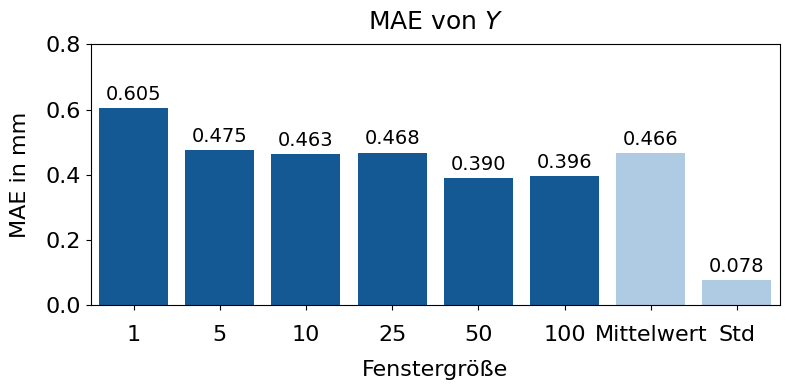

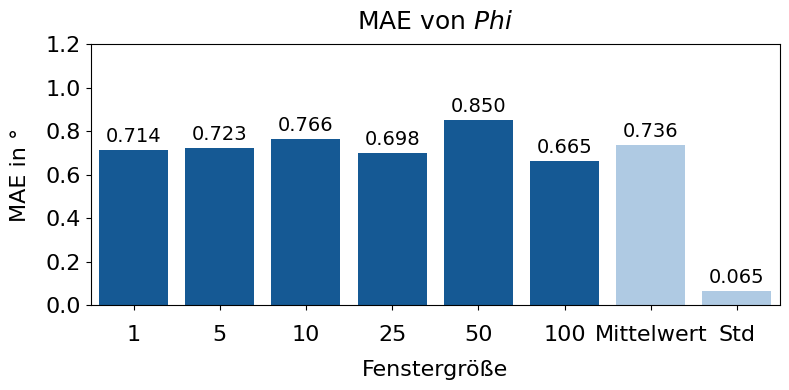

In [47]:
### Plots Prädikationsfrequenz und Einfluss der Window Size

import pandas as pd

# Reinladen der Daten von Mittelwert und Standardabweichung der vier konventionellen Modelle 
Ordner_frequenz = r'C:\Users\corvi\OneDrive - stud.tu-darmstadt.de\Desktop\Masterthesis\13_ExcelvonDaten_Code\DeepLearning\CNN\Test_Prädiktionsfrequenz'

Ordner_window= r'C:\Users\corvi\OneDrive - stud.tu-darmstadt.de\Desktop\Masterthesis\13_ExcelvonDaten_Code\DeepLearning\CNN\Einfluss_WindowSize'

# Prädikationsfrequenz
#MAEs =pd.read_csv(f'{Ordner_frequenz}\Prädiktionsfrequenz_bestesCNN_MAEs_Random11.csv', delimiter= ';')

# Windowsize
MAEs =pd.read_csv(f'{Ordner_window}\CNN_Blechsplit_Random11_EinflussWindowSize.csv', delimiter= ';')

print(MAEs)
MAEs= MAEs.drop(columns=['Unnamed: 0'])
# MAEs_60Trials['Datentyp1'] = MAEs_60Trials['Datentyp1'].replace('Blechsplit', '60 Trials')
# MAEs_30Trials['Datentyp1'] = MAEs_30Trials['Datentyp1'].replace('Blechsplit', '30 Trials')

columns = ['X','Y','Phi']

for Column in columns:
        MAEs[Column] = MAEs[Column].astype(str).str.replace(',', '.')
        MAEs[Column] = MAEs[Column].astype(float)
        
print(MAEs)

X_Label = MAEs.columns[0]
print(X_Label)
  
#print(MAEs_ges)
MAEs_ges = MAEs[MAEs[X_Label].isin(['Mittelwert','Standardabweichung'])]
MAEs_alle = MAEs[MAEs[X_Label] != 'Standardabweichung']


Umbenennung = {'Standardabweichung':'Std'}
MAEs[X_Label] = MAEs[X_Label].replace(Umbenennung)

# Plot der MAE's aller konventionellen Methoden in Gegenüberstellung der unterschiedlichen Splits

Labels = ['X', 'Y', 'Phi']
Y_Achse = ['mm', 'mm', '°']

color_thesis1 =(0, 90/255, 169/255) # Dunkelblau aus Thesis
color_thesis2 =(166/255, 202/255, 236/255)  #Hellblau aus Abbildungen
color_thesis3 =(77/255, 140/255, 195/255) #mittleres Blau
#custom_palette = sns.color_palette(["#1f77b4", "#aec7e8", "#003f5c", "#7fbc41", "#2ca02c", "#98df8a"])
custom_palette = sns.color_palette([color_thesis1,color_thesis2])
palette = [color_thesis1] * (len(MAEs) - 2) + [color_thesis2, color_thesis2]

max_y_value = MAEs['Y'].max()

Sicherungsordner_frequenz= f'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\\Desktop\\Masterthesis\\15_Plots\\DeepLearning\Prädiktionsfrequenz_CNN'     
Sicherungsordner_Window = f'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\\Desktop\\Masterthesis\\15_Plots\\DeepLearning\Window_Size_CNN'     
# Sicherstellen, dass das Verzeichnis existiert
os.makedirs(Sicherungsordner, exist_ok=True)

# Schleife durch Metriken (X, y, phi)
for index, (Label, Einheit) in enumerate(zip(Labels, Y_Achse)):
    plt.figure(figsize=(8,4))
    ax = sns.barplot(data=MAEs, x=X_Label, y=Label, palette=palette , width=0.8)
    plt.title(f'MAE von $\\it{{{Label}}}$', fontsize=18, pad=11)
    ax.set_xlabel(X_Label, fontsize=16, labelpad=11)
    # Anpassen der Y-Achsen-Beschriftung mit kursivem 'mm' oder anderer Einheit
    ax.set_ylabel(f'MAE in {Einheit}', fontsize=16, labelpad=11)  # MathText für Kursivschrift

    for p in ax.patches:
        height = p.get_height()
        display_value = 0 if height < 0.0009 else height
        ax.annotate(f'{display_value:.3f}' if display_value != 0 else '0',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14)

        
        # Problem mit Beschriftung der Balken (krzeut immer den Rand des Diagramms), deshalb wird hier der höchste Wert ermittelt und eine Obergrenze festgelegt
      
        max_value = MAEs[Label].max()  # Höchster Balkenwert
        
        if Label == 'X':
                plt.ylim(0, max_y_value * 1.3)  # Verwende den maximalen Y-Wert für X
        else:
                plt.ylim(0, max_value * 1.3) 
        
        # Rotate x-axis labels
        #plt.xticks(rotation=45, ha='right')
        
        # X- und Y-Achsen Bereich, falls Schriftgröße angepasst werden muss
        ax.tick_params(axis='x', labelsize=16, pad=10.5)  
        ax.tick_params(axis='y', labelsize=16) 
        
        y_ticks = np.arange(0, plt.ylim()[1] + 0.1, 0.2)  # Beispielhafte Intervalle
        ax.set_yticks(y_ticks)
        
        plt.tight_layout()
        
        # Speicherung der Daten als png und svg
        plt.savefig(os.path.join(Sicherungsordner_Window, f'{Label}_Einfluss_Window_Size_11.svg'), format='svg')    
        plt.savefig(os.path.join(Sicherungsordner_Window, f'{Label}_Einfluss_Window_Size_11.png'), format='png')      

#plt.show()

   Unnamed: 0 Prädiktionsfrequenz    Datentyp Error            X            Y  \
0           0                   1  Blechsplit   MAE  0,008297832  0,558982198   
1           1                   5  Blechsplit   MAE  0,008267897  0,558902409   
2           2                  10  Blechsplit   MAE    0,0082959  0,559721584   
3           3                  25  Blechsplit   MAE  0,008323784  0,558045543   
4           4                  50  Blechsplit   MAE  0,008217115  0,555430483   
5           5                 100  Blechsplit   MAE   0,00835114  0,547914266   
6           6          Mittelwert  Blechsplit   MAE  0,008292278  0,556499414   
7           7  Standardabweichung  Blechsplit   MAE     4,64E-05  0,004462261   

           Phi  
0  0,794832383  
1  0,793850746  
2   0,79542314  
3  0,793130964  
4  0,791207209  
5   0,79135314  
6  0,793299597  
7   0,00175259  
  Prädiktionsfrequenz    Datentyp Error         X         Y       Phi
0                   1  Blechsplit   MAE  0.0082

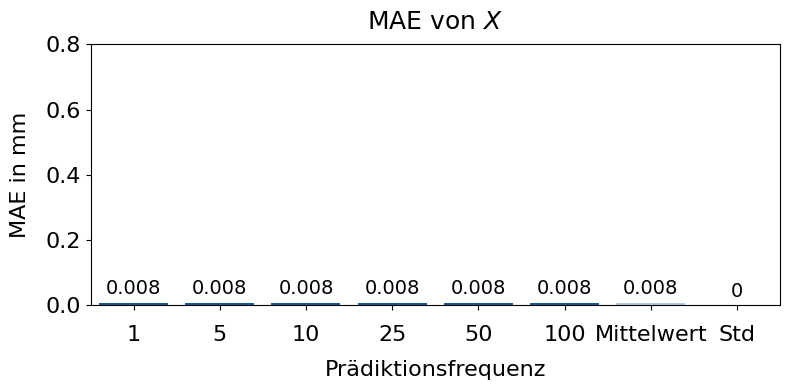

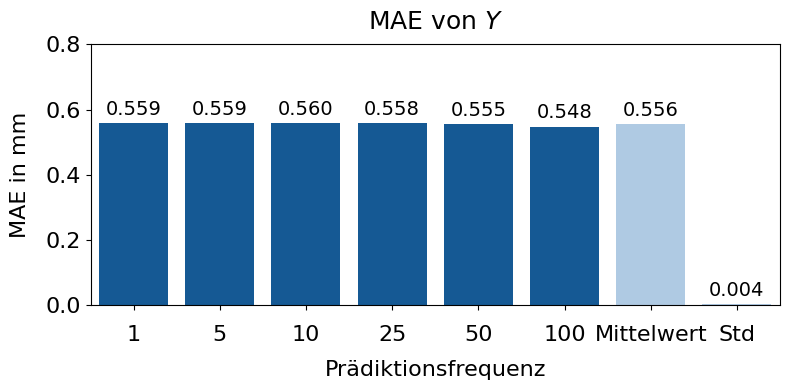

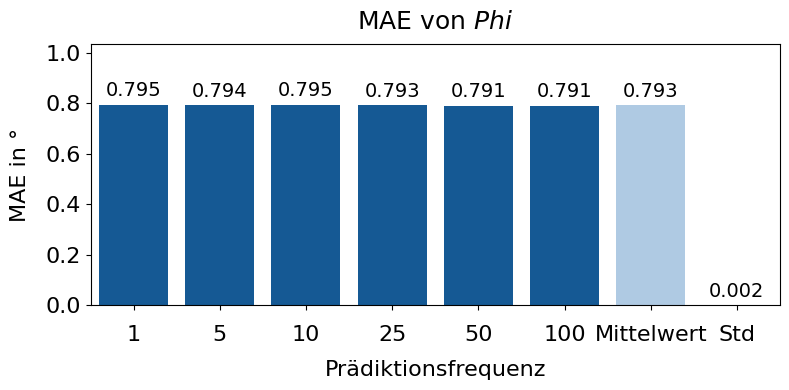

In [52]:
### Plots Prädikationsfrequenz und Einfluss der Window Size

#Plots für den Vergleich der Ergebnisse der Bayesian Optimization für 30 und 60 Trials 
import pandas as pd

# Reinladen der Daten von Mittelwert und Standardabweichung der vier konventionellen Modelle 
Ordner_frequenz = r'C:\Users\corvi\OneDrive - stud.tu-darmstadt.de\Desktop\Masterthesis\13_ExcelvonDaten_Code\DeepLearning\CNN\Test_Prädiktionsfrequenz'

# Prädikationsfrequenz
MAEs =pd.read_csv(f'{Ordner_frequenz}\Prädikationsfrequenz_bestesCNN_MAEs_RandomAlle_Sorted.csv', delimiter= ';')


print(MAEs)
MAEs= MAEs.drop(columns=['Unnamed: 0'])
# MAEs_60Trials['Datentyp1'] = MAEs_60Trials['Datentyp1'].replace('Blechsplit', '60 Trials')
# MAEs_30Trials['Datentyp1'] = MAEs_30Trials['Datentyp1'].replace('Blechsplit', '30 Trials')

columns = ['X','Y','Phi']

for Column in columns:
        MAEs[Column] = MAEs[Column].astype(str).str.replace(',', '.')
        MAEs[Column] = MAEs[Column].astype(float)
        
print(MAEs)

X_Label = MAEs.columns[0]
print(X_Label)
  
#print(MAEs_ges)
MAEs_ges = MAEs[MAEs[X_Label].isin(['Mittelwert','Standardabweichung'])]
MAEs_alle = MAEs[MAEs[X_Label] != 'Standardabweichung']


Umbenennung = {'Standardabweichung':'Std'}
MAEs[X_Label] = MAEs[X_Label].replace(Umbenennung)

# Plot der MAE's aller konventionellen Methoden in Gegenüberstellung der unterschiedlichen Splits

Labels = ['X', 'Y', 'Phi']
Y_Achse = ['mm', 'mm', '°']

color_thesis1 =(0, 90/255, 169/255) # Dunkelblau aus Thesis
color_thesis2 =(166/255, 202/255, 236/255)  #Hellblau aus Abbildungen
color_thesis3 =(77/255, 140/255, 195/255) #mittleres Blau
#custom_palette = sns.color_palette(["#1f77b4", "#aec7e8", "#003f5c", "#7fbc41", "#2ca02c", "#98df8a"])
custom_palette = sns.color_palette([color_thesis1,color_thesis2])
palette = [color_thesis1] * (len(MAEs) - 2) + [color_thesis2, color_thesis2]


max_y_value = MAEs['Y'].max()

Sicherungsordner_frequenz= f'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\\Desktop\\Masterthesis\\15_Plots\\DeepLearning\Prädiktionsfrequenz_CNN'     
Sicherungsordner_Window = f'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\\Desktop\\Masterthesis\\15_Plots\\DeepLearning\Window_Size_CNN'     
# Sicherstellen, dass das Verzeichnis existiert
os.makedirs(Sicherungsordner, exist_ok=True)

# Schleife durch Metriken (X, y, phi)
for index, (Label, Einheit) in enumerate(zip(Labels, Y_Achse)):
    plt.figure(figsize=(8,4))
    ax = sns.barplot(data=MAEs, x=X_Label, y=Label, palette=palette , width=0.8)
    plt.title(f'MAE von $\\it{{{Label}}}$', fontsize=18, pad=11)
    ax.set_xlabel(X_Label, fontsize=16, labelpad=11)
    # Anpassen der Y-Achsen-Beschriftung mit kursivem 'mm' oder anderer Einheit
    ax.set_ylabel(f'MAE in {Einheit}', fontsize=16, labelpad=11)  # MathText für Kursivschrift

    for p in ax.patches:
        height = p.get_height()
        display_value = 0 if height < 0.0009 else height
        ax.annotate(f'{display_value:.3f}' if display_value != 0 else '0',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14)

        
        # Problem mit Beschriftung der Balken (krzeut immer den Rand des Diagramms), deshalb wird hier der höchste Wert ermittelt und eine Obergrenze festgelegt
         
        max_value = MAEs[Label].max()  # Höchster Balkenwert
        
        if Label == 'X':
                plt.ylim(0, max_y_value * 1.3)  # Verwende den maximalen Y-Wert für X
        else:
                plt.ylim(0, max_value * 1.3)  
        
        # Rotate x-axis labels
        #plt.xticks(rotation=45, ha='right')
        
        # X- und Y-Achsen Bereich, falls Schriftgröße angepasst werden muss
        ax.tick_params(axis='x', labelsize=16, pad=10.5)  
        ax.tick_params(axis='y', labelsize=16) 
        
        y_ticks = np.arange(0, plt.ylim()[1] + 0.1, 0.2)  # Beispielhafte Intervalle
        ax.set_yticks(y_ticks)
        
        plt.tight_layout()
        
        # Speicherung der Daten als png und svg
        plt.savefig(os.path.join(Sicherungsordner_frequenz, f'{Label}_Einfluss_Prädiktionsfrequenz_RandomSeed2.svg'), format='svg')    
        plt.savefig(os.path.join(Sicherungsordner_frequenz, f'{Label}_Einfluss_Prädiktionsfrequenz_RandomSeed2.png'), format='png')      

#plt.show()

    Unnamed: 0           Durchlauf       Datentyp Error  \
0            0                   1  Standardsplit   MAE   
1            1                   2  Standardsplit   MAE   
2            2                   3  Standardsplit   MAE   
3            3                   4  Standardsplit   MAE   
4            4                   5  Standardsplit   MAE   
5            5                   6  Standardsplit   MAE   
6            6                   7  Standardsplit   MAE   
7            7                   8  Standardsplit   MAE   
8            8                   9  Standardsplit   MAE   
9            9                  10  Standardsplit   MAE   
10          10          Mittelwert     Blechsplit   MAE   
11          11  Standardabweichung     Blechsplit   MAE   

                        X                    Y                   Phi  
0    0,007154907057842601  0,40095061247920094    0,8490387611600652  
1    0,011868633406820425  0,42520103222279493    0,6863734221829552  
2     0,01997340788

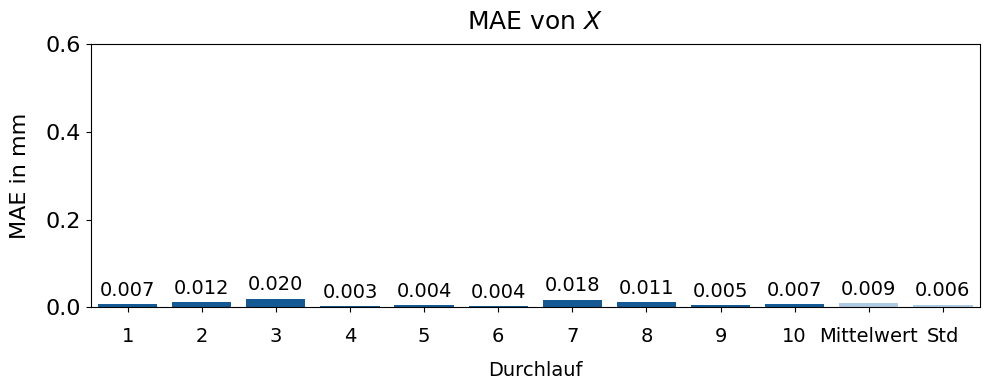

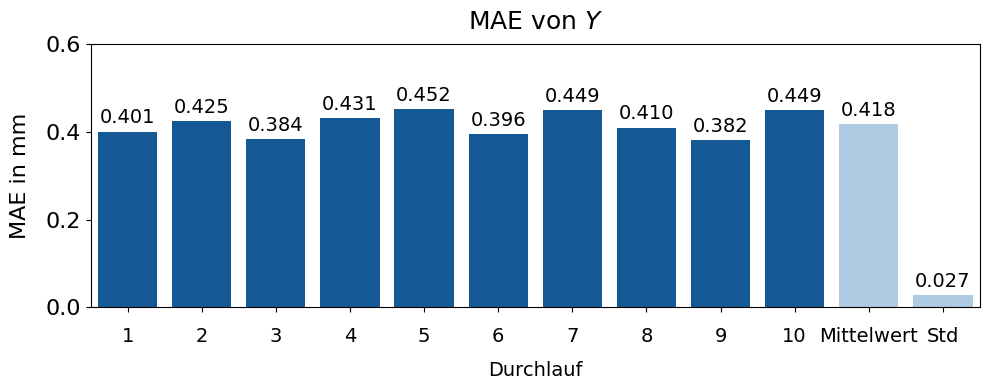

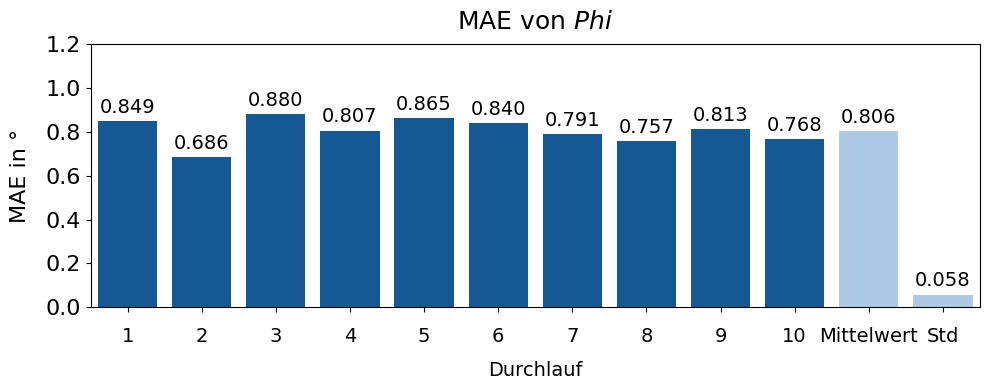

In [56]:
# Plots für die Cross Validation des CNNs für einen bestimmten Zufallsfaktor

### Plots Prädiktionsfrequenz und Einfluss der Window Size

#Plots für den Vergleich der Ergebnisse der Bayesian Optimization für 30 und 60 Trials 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import numpy as np
import os
import pandas as pd

# Reinladen der Daten von Mittelwert und Standardabweichung der vier konventionellen Modelle 
Ordner = r'C:\Users\corvi\OneDrive - stud.tu-darmstadt.de\Desktop\Masterthesis\13_ExcelvonDaten_Code\DeepLearning\CNN\CrossValidation'

MAEs =pd.read_csv(f'{Ordner}\CNN_Blechsplit_Random11_CrossValidation.csv', delimiter= ';')

print(MAEs)
MAEs= MAEs.drop(columns=['Unnamed: 0'])
# MAEs_60Trials['Datentyp1'] = MAEs_60Trials['Datentyp1'].replace('Blechsplit', '60 Trials')
# MAEs_30Trials['Datentyp1'] = MAEs_30Trials['Datentyp1'].replace('Blechsplit', '30 Trials')

columns = ['X','Y','Phi']

for Column in columns:
        MAEs[Column] = MAEs[Column].astype(str).str.replace(',', '.')
        MAEs[Column] = MAEs[Column].astype(float)
        
print(MAEs)

X_Label = MAEs.columns[0]
#print(X_Label)
  
#print(MAEs_ges)
MAEs_ges = MAEs[MAEs[X_Label].isin(['Mittelwert','Standardabweichung'])]
MAEs_alle = MAEs[MAEs[X_Label] != 'Standardabweichung']

Umbenennung = {'Standardabweichung':'Std'}
MAEs[X_Label] = MAEs[X_Label].replace(Umbenennung)

# Plot der MAE's aller konventionellen Methoden in Gegenüberstellung der unterschiedlichen Splits

Labels = ['X', 'Y', 'Phi']
Y_Achse = ['mm', 'mm', '°']

color_thesis1 =(0, 90/255, 169/255) # Dunkelblau aus Thesis
color_thesis2 =(166/255, 202/255, 236/255)  #Hellblau aus Abbildungen
color_thesis3 =(77/255, 140/255, 195/255) #mittleres Blau
#custom_palette = sns.color_palette(["#1f77b4", "#aec7e8", "#003f5c", "#7fbc41", "#2ca02c", "#98df8a"])
custom_palette = sns.color_palette([color_thesis1,color_thesis2])
palette = [color_thesis1] * (len(MAEs) - 2) + [color_thesis2, color_thesis2]

max_y_value = MAEs['Y'].max()

Sicherungsordner=  r'C:\Users\corvi\OneDrive - stud.tu-darmstadt.de\Desktop\Masterthesis\15_Plots\DeepLearning\CNN_CrossValidation'
# Sicherstellen, dass das Verzeichnis existiert
os.makedirs(Sicherungsordner, exist_ok=True)

# Schleife durch Metriken (X, y, phi)
for index, (Label, Einheit) in enumerate(zip(Labels, Y_Achse)):
    plt.figure(figsize=(10,4))
    ax = sns.barplot(data=MAEs, x=X_Label, y=Label, palette=palette , width=0.8)
    plt.title(f'MAE von $\\it{{{Label}}}$', fontsize=18, pad=11)
    ax.set_xlabel(X_Label, fontsize=14, labelpad=11)
    # Anpassen der Y-Achsen-Beschriftung mit kursivem 'mm' oder anderer Einheit
    ax.set_ylabel(f'MAE in {Einheit}', fontsize=16, labelpad=11)  # MathText für Kursivschrift

    for p in ax.patches:
        height = p.get_height()
        display_value = 0 if height < 0.0009 else height
        ax.annotate(f'{display_value:.3f}' if display_value != 0 else '0',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14)

        
        # Problem mit Beschriftung der Balken (krzeut immer den Rand des Diagramms), deshalb wird hier der höchste Wert ermittelt und eine Obergrenze festgelegt
        
        max_value = MAEs[Label].max()  # Höchster Balkenwert
        
        if Label == 'X':
                plt.ylim(0, max_y_value * 1.3)  # Verwende den maximalen Y-Wert für X
        else:
                plt.ylim(0, max_value * 1.3) 
        
        # Rotate x-axis labels
        #plt.xticks(rotation=45, ha='right')
        
        # X- und Y-Achsen Bereich, falls Schriftgröße angepasst werden muss
        ax.tick_params(axis='x', labelsize=14, pad=10.5)  
        ax.tick_params(axis='y', labelsize=16) 
        
        y_ticks = np.arange(0, plt.ylim()[1] + 0.1, 0.2)  # Beispielhafte Intervalle
        ax.set_yticks(y_ticks)
        
        plt.tight_layout()
        
        # Speicherung der Daten als png und svg
        plt.savefig(os.path.join(Sicherungsordner, f'{Label}_CrossValidation_11.svg'), format='svg')    
        plt.savefig(os.path.join(Sicherungsordner, f'{Label}_CrossValidation_11.png'), format='png')      

#plt.show()

                   CV1 Error1                      X                     Y  \
0                    7    MAE   0,009641257208360973    0,2982279767712663   
1                   11    MAE   0,017614396088176866   0,25881091324123423   
2                   10    MAE   0,011881649349529982    0,2940085108585192   
3                   46    MAE  0,0013992180121284135   0,34607235361938643   
4                   21    MAE   0,009311166505722503   0,37524812515209605   
5                   94    MAE  0,0059254383699706824     0,301719940132376   
6                   85    MAE  0,0015596262572321325    0,3078698745004815   
7                   39    MAE  0,0019285096179939962   0,33956652201165083   
8                   32    MAE   0,008938143057495962    0,4519786672843568   
9                   77    MAE  0,0029389619302890558   0,30166530573929395   
10          Mittelwert    MAE   0,007113836639690058    0,3275168189310661   
11  Standardabweichung    MAE   0,005341385573302336  0,05444616

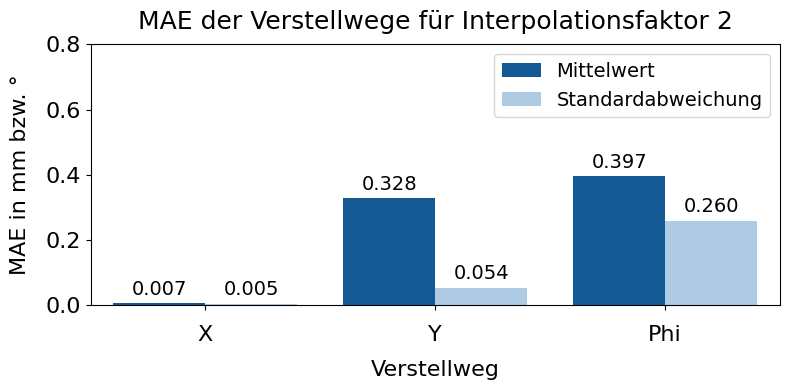

In [83]:
#Ergebnisse CNN mit Interpolationsfaktor2
import pandas as pd

# Reinladen der Daten von Mittelwert und Standardabweichung der vier konventionellen Modelle 
Ordner = r'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\Desktop\\Masterthesis\\13_ExcelvonDaten_Code\\DeepLearning\\Interpolation_CNN'

# Für die Ergebnisse des gesamten stationären Bereiches ohne Features
MAEs =pd.read_csv(f'{Ordner}\CNN_Blechsplit_Randomseed2_Modell3_Interpolation_Faktor2.csv', delimiter= ';')

#MAEs =pd.read_csv(f'{Ordner}\CNN_Blechsplit_Randomseed2_bestesModell_WindowSize25.csv', delimiter= ';')

# print(MAEs)
MAEs = MAEs.drop(columns=['Unnamed: 0','CV','Datentyp','Error','X','y','phi','Datentyp1'])


#MAEs['Datentyp1'] = MAEs['Datentyp1'].replace('Blechsplit', '60 Trials')


Ersetzen = {
    'X1': 'X',
    'y1': 'Y',
    'phi1': 'Phi'}

MAEs = MAEs.rename(columns=Ersetzen)
print(MAEs)

columns = ['X','Y','Phi']

for Column in columns:
        MAEs[Column] = MAEs[Column].astype(str).str.replace(',', '.')
        MAEs[Column] = MAEs[Column].astype(float)
        
print(MAEs)
MAEs_x = MAEs[MAEs['CV1'].isin(['Mittelwert','Standardabweichung'])]
# MAEs_Mittelwert = MAEs_ges[MAEs_ges['CV1']=='Mittelwert']
# MAEs_Standardabweichung = MAEs_ges[MAEs_ges['CV1']=='Standardabweichung']
print(MAEs_x)

# Umstrukturieren des DataFrames
MAEs_melted = MAEs_x.melt(id_vars=['CV1'], value_vars=['X', 'Y', 'Phi'],
                            var_name='Verstellweg', value_name='MAE')

print(MAEs_melted)
# Beispielhafter Plot für MAE Testdaten
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Plot der MAE's aller konventionellen Methoden in Gegenüberstellung der unterschiedlichen Splits

Labels = ['Mittelwert', 'Standardabweichung']

color_thesis1 =(0, 90/255, 169/255) # Dunkelblau aus Thesis
color_thesis2 =(166/255, 202/255, 236/255)  #Hellblau aus Abbildungen
color_thesis3 =(77/255, 140/255, 195/255) #mittleres Blau
#custom_palette = sns.color_palette(["#1f77b4", "#aec7e8", "#003f5c", "#7fbc41", "#2ca02c", "#98df8a"])
custom_palette = sns.color_palette([color_thesis1,color_thesis2])


Sicherungsordner = f'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\\Desktop\\Masterthesis\\15_Plots\\Interpolation'     
# Sicherstellen, dass das Verzeichnis existiert
os.makedirs(Sicherungsordner, exist_ok=True)



plt.figure(figsize=(8,4))
ax = sns.barplot(data=MAEs_melted, x='Verstellweg', y='MAE', hue='CV1', palette=custom_palette)
plt.title(f'MAE der Verstellwege für Interpolationsfaktor 2', fontsize=18, pad=11)
ax.set_xlabel('Verstellweg', fontsize=16, labelpad=11)
# Anpassen der Y-Achsen-Beschriftung mit kursivem 'mm' oder anderer Einheit
ax.set_ylabel(f'MAE in mm bzw. °', fontsize=16, labelpad=11)  # MathText für Kursivschrift

for p in ax.patches:
    height = p.get_height()
    display_value = 0 if height < 0.0009 else height
    ax.annotate(f'{display_value:.3f}' if display_value != 0 else '0',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=14)
    
    
    # Anpassen der Legende, um Titel dieser zu entfernen 
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles[0:2], labels[0:2], title=None, loc='upper right', fontsize=14)

    
    # Problem mit Beschriftung der Balken (krzeut immer den Rand des Diagramms), deshalb wird hier der höchste Wert ermittelt und eine Obergrenze festgelegt
      
    plt.ylim(0,0.8)
    
    # Rotate x-axis labels
    #plt.xticks(rotation=45, ha='right')
    
    # X- und Y-Achsen Bereich, falls Schriftgröße angepasst werden muss
    ax.tick_params(axis='x', labelsize=16, pad=10.5)  
    ax.tick_params(axis='y', labelsize=16) 
    
    y_ticks = np.arange(0, plt.ylim()[1] + 0.1, 0.2)  # Beispielhafte Intervalle
    ax.set_yticks(y_ticks)
    
    plt.tight_layout()
    # Zur Speicherung der Plots muss aktiviert sein
    plt.savefig(os.path.join(Sicherungsordner, f'{cv}_CNN_Intfaktor2.svg'), format='svg')    
    plt.savefig(os.path.join(Sicherungsordner, f'{cv}_CNN_Intfaktor2.png'), format='png')      

plt.show()

    Unnamed: 0                  CV Error         X         Y       Phi
0            0                   7   MAE  0.061273  4.560065  1.653016
1            1                  11   MAE  0.061521  4.574307  1.661340
2            2                  10   MAE  0.061194  4.572987  1.669628
3            3                  46   MAE  0.061215  4.564206  1.660067
4            4                  21   MAE  0.061287  4.560041  1.660738
5            5                  94   MAE  0.061339  4.570949  1.658434
6            6                  85   MAE  0.061431  4.593318  1.665319
7            7                  39   MAE  0.061274  4.565038  1.656742
8            8                  32   MAE  0.061312  4.570042  1.658110
9            9                  77   MAE  0.061430  4.574128  1.656069
10          10          Mittelwert   MAE  0.061328  4.570508  1.659946
11          11  Standardabweichung   MAE  0.000104  0.009676  0.004763
    Unnamed: 0                  CV Error         X         Y       Phi
10    

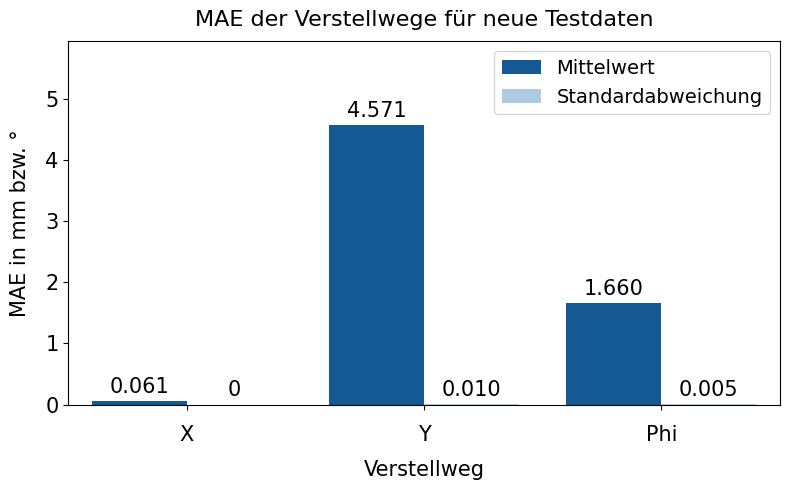

In [70]:
#Ergebnisse CNN mit Interpolationsfaktor2
import pandas as pd

# Reinladen der Daten von Mittelwert und Standardabweichung der neuen Testdaten
Ordner_kurzesBlech = r'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\Desktop\\Masterthesis\\13_ExcelvonDaten_Code\\Evaluation_kurzesBlech'


# Kurzes Blech Ergebnisse
MAEs =pd.read_csv(f'{Ordner_kurzesBlech}\MAE_CNNmitIntfaktor2_neuesBlech.csv', delimiter= ';')

# print(MAEs


# MAEs['Datentyp1'] = MAEs['Datentyp1'].replace('Blechsplit', '60 Trials')

#print(MAEs_ges)

columns = ['X','Y','Phi']

for Column in columns:
        MAEs[Column] = MAEs[Column].astype(str).str.replace(',', '.')
        MAEs[Column] = MAEs[Column].astype(float)
        
print(MAEs)
MAEs_x = MAEs[MAEs['CV'].isin(['Mittelwert','Standardabweichung'])]
# MAEs_Mittelwert = MAEs_ges[MAEs_ges['CV1']=='Mittelwert']
# MAEs_Standardabweichung = MAEs_ges[MAEs_ges['CV1']=='Standardabweichung']
print(MAEs_x)

# Umstrukturieren des DataFrames
MAEs_melted = MAEs_x.melt(id_vars=['CV'], value_vars=['X', 'Y', 'Phi'],
                            var_name='Verstellweg', value_name='MAE')

print(MAEs_melted)
# Beispielhafter Plot für MAE Testdaten
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Plot der MAE's aller konventionellen Methoden in Gegenüberstellung der unterschiedlichen Splits

Labels = ['Mittelwert', 'Standardabweichung']

color_thesis1 =(0, 90/255, 169/255) # Dunkelblau aus Thesis
color_thesis2 =(166/255, 202/255, 236/255)  #Hellblau aus Abbildungen
color_thesis3 =(77/255, 140/255, 195/255) #mittleres Blau
#custom_palette = sns.color_palette(["#1f77b4", "#aec7e8", "#003f5c", "#7fbc41", "#2ca02c", "#98df8a"])
custom_palette = sns.color_palette([color_thesis1,color_thesis2])


Sicherungsordner = f'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\\Desktop\\Masterthesis\\15_Plots\\Evaluation_kurzesBlech'     
# Sicherstellen, dass das Verzeichnis existiert
os.makedirs(Sicherungsordner, exist_ok=True)

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=MAEs_melted, x='Verstellweg', y='MAE', hue='CV', palette=custom_palette)
plt.title(f'MAE der Verstellwege für neue Testdaten', fontsize=16, pad=11)
ax.set_xlabel('Verstellweg', fontsize=15, labelpad=11)
# Anpassen der Y-Achsen-Beschriftung mit kursivem 'mm' oder anderer Einheit
ax.set_ylabel(f'MAE in mm bzw. °', fontsize=15, labelpad=11)  # MathText für Kursivschrift

# Werte auf den Balken anzeigen

# Ticks Größe ändern
ax.tick_params(axis='x', labelsize=15, pad=11)  # Größe der x-Achsen-Ticks
ax.tick_params(axis='y', labelsize=15)  # Größe der y-Achsen-Ticks

for p in ax.patches:
    height = p.get_height()
    display_value = 0 if height < 0.0009 else height
    ax.annotate(f'{display_value:.3f}' if display_value != 0 else '0',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=15)
    
    # Anpassen der Legende, um Titel dieser zu entfernen 
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles[0:2], labels[0:2], title=None, loc='upper right', fontsize=14)
    
    # Problem mit Beschriftung der Balken (krzeut immer den Rand des Diagramms), deshalb wird hier der höchste Wert ermittelt und eine Obergrenze festgelegt
    max_value = MAEs_melted['MAE'].max()  # Höchster Balkenwert
    plt.ylim(0, max_value * 1.3)  
    
    plt.tight_layout()
    
    # Zur Speicherung der Plots muss aktiviert sein
    plt.savefig(os.path.join(Sicherungsordner, f'bestesCNN-mitInterpolation_Faktor2_RandomSeed2.svg'), format='svg')    
    plt.savefig(os.path.join(Sicherungsordner, f'bestesCNN-mitInterpolation_Faktor2_RandomSeed2.png'), format='png')      

plt.show()

       Model        Datentyp               Error             X         Y  \
0         LR  Standard Split          Mittelwert  1.250000e-15  0.924842   
1        RFR  Standard Split          Mittelwert  6.310000e-05  0.008939   
2        KNR  Standard Split          Mittelwert  5.890000e-18  0.001732   
3         LR     Blech Split          Mittelwert  1.870000e-15  0.998415   
4        RFR     Blech Split          Mittelwert  9.194464e-02  0.873458   
5        KNR     Blech Split          Mittelwert  5.714286e-02  1.061488   
6         LR  Standard Split  Standardabweichung  7.460000e-16  0.002895   
7        RFR  Standard Split  Standardabweichung  8.640000e-06  0.000237   
8        KNR  Standard Split  Standardabweichung  3.700000e-19  0.000250   
9         LR     Blech Split  Standardabweichung  1.370000e-15  0.146606   
10       RFR     Blech Split  Standardabweichung  7.958596e-02  0.157625   
11       KNR     Blech Split  Standardabweichung  7.377111e-02  0.208681   
12       MLP

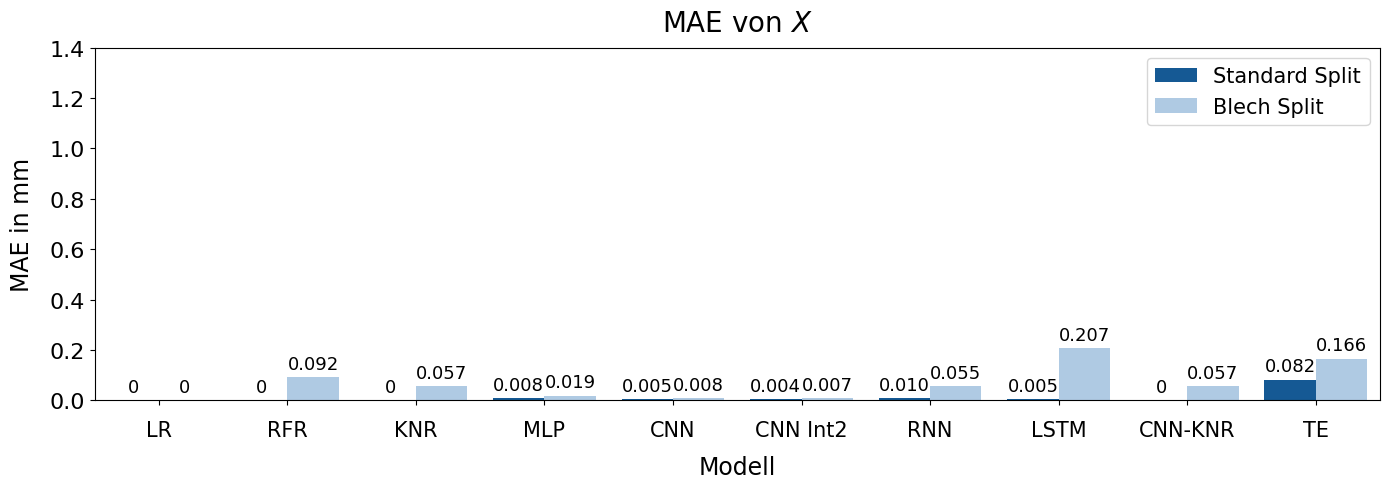

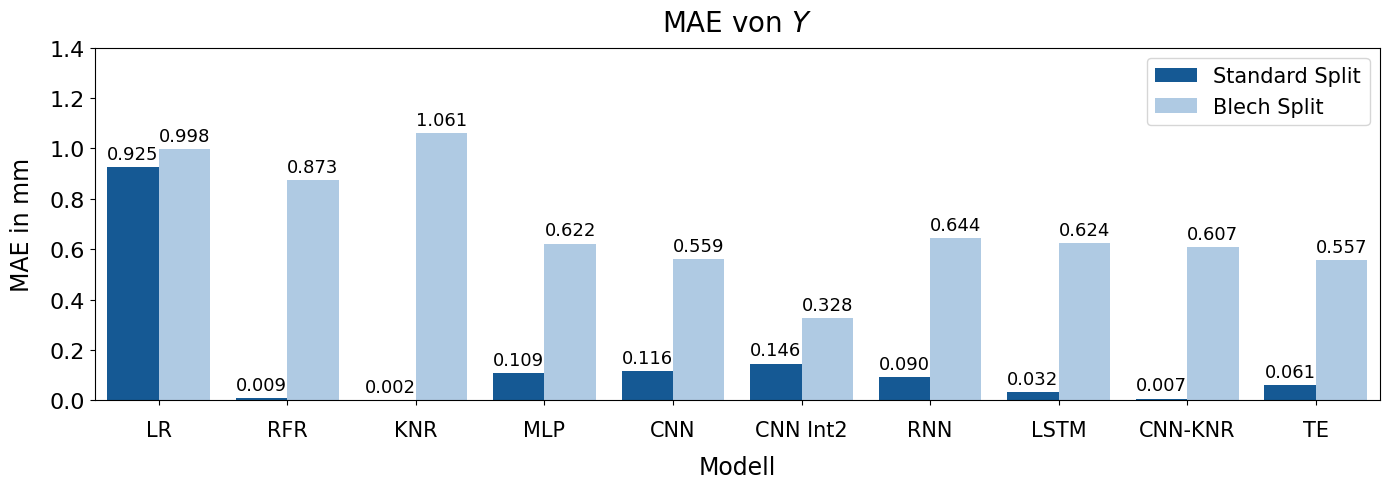

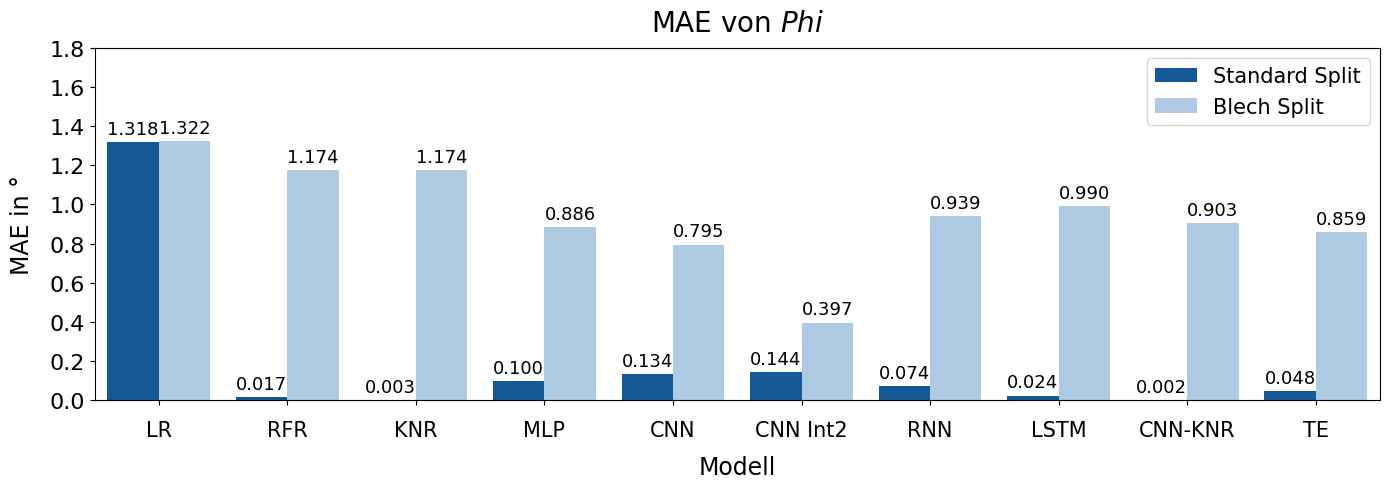

In [62]:
# Plots für die Gesamtübersicht von allen Modellen

import pandas as pd
import os
Speichern =0
# Reinladen der Daten von Mittelwert und Standardabweichung der vier konventionellen Modelle 
Ordner = r'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\Desktop\\Masterthesis\\13_ExcelvonDaten_Code\\DeepLearning\\Gesamtübersicht'

# Kurzes Blech Ergebnisse
MAEs =pd.read_csv(f'{Ordner}\Alle_Modelle_Ergebnisse.csv', delimiter= ';')

columns = ['X','Y','Phi']

for Column in columns:
        MAEs[Column] = MAEs[Column].astype(str).str.replace(',', '.')
        MAEs[Column] = MAEs[Column].astype(float)

MAEs= MAEs.drop(columns=['Unnamed: 0'])

Umbenennung_Split = {'Standardsplit':'Standard Split', 'Blechsplit':'Blech Split'}
MAEs['Datentyp'] = MAEs['Datentyp'].replace(Umbenennung_Split)

print(MAEs)

#MAEs_Mittelwert = MAEs[MAEs['Datentyp'] == 'Blech Split']
MAEs_Mittelwert = MAEs[MAEs['Error'] == 'Mittelwert']


#MAEs_Mittelwert = MAEs_Mittelwert[MAEs_alle['Datentyp'] == 'Blechsplit']

# Beispielhafter Plot für MAE Testdaten
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Plot der MAE's aller konventionellen Methoden in Gegenüberstellung der unterschiedlichen Splits

Labels = ['X', 'Y', 'Phi']
Y_Achse = ['mm', 'mm', '°']

color_thesis1 =(0, 90/255, 169/255) # Dunkelblau aus Thesis
color_thesis2 =(166/255, 202/255, 236/255)  #Hellblau aus Abbildungen
color_thesis3 =(77/255, 140/255, 195/255) #mittleres Blau
#custom_palette = sns.color_palette(["#1f77b4", "#aec7e8", "#003f5c", "#7fbc41", "#2ca02c", "#98df8a"])
custom_palette = sns.color_palette([color_thesis1,color_thesis2])


Sicherungsordner = f'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\\Desktop\\Masterthesis\\15_Plots\\Gesamtübersicht_MAEs'     
# Sicherstellen, dass das Verzeichnis existiert
os.makedirs(Sicherungsordner, exist_ok=True)

max_y_value = MAEs['Y'].max()

# Schleife durch Metriken (X, y, phi)
for index, (Label, Einheit) in enumerate(zip(Labels, Y_Achse)):
    plt.figure(figsize=(14,5))
    ax = sns.barplot(data=MAEs_Mittelwert, x='Model', y=Label, hue='Datentyp', palette=custom_palette, width=0.8)
    plt.title(f'MAE von $\\it{{{Label}}}$', fontsize=20, pad=12)
    ax.set_xlabel('Modell', fontsize=17, labelpad=11)
    # Anpassen der Y-Achsen-Beschriftung mit kursivem 'mm' oder anderer Einheit
    ax.set_ylabel(f'MAE in {Einheit}', fontsize=17, labelpad=11)  # MathText für Kursivschrift


    for p in ax.patches:
        height = p.get_height()
        display_value = 0 if height < 0.0009 else height
        ax.annotate(f'{display_value:.3f}' if display_value != 0 else '0',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=13)
        
        # Anpassen der Legende, um Titel dieser zu entfernen 
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles[0:2], labels[0:2], title=None, loc='upper right', fontsize=15)
        
     # Problem mit Beschriftung der Balken (krzeut immer den Rand des Diagramms), deshalb wird hier der höchste Wert ermittelt und eine Obergrenze festgelegt
     
        max_value = MAEs_Mittelwert[Label].max()  # Höchster Balkenwert
        
        if Label == 'X':
                plt.ylim(0, max_y_value * 1.3)  # Verwende den maximalen Y-Wert für X
        else:
                plt.ylim(0, max_value * 1.3) 
        
        # Rotate x-axis labels
        #plt.xticks(rotation=45, ha='right')
        
        # X- und Y-Achsen Bereich, falls Schriftgröße angepasst werden muss
        ax.tick_params(axis='x', labelsize=15, pad=10.5)  
        ax.tick_params(axis='y', labelsize=16) 
        
        y_ticks = np.arange(0, plt.ylim()[1] + 0.1, 0.2)  # Beispielhafte Intervalle
        ax.set_yticks(y_ticks)
        
        plt.tight_layout()
        
        # Speicherung der Daten als png und svg
        plt.savefig(os.path.join(Sicherungsordner, f'{Label}_MAE_BlechundStandard_Gesamtübersicht.svg'), format='svg')    
        plt.savefig(os.path.join(Sicherungsordner, f'{Label}_MAE_BlechundStandard_Gesamtübersicht.png'), format='png')      

#plt.show()